# Exploratory analysis 

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import sklearn as sk

In [5]:
data = pd.read_csv("aircraftdata-python.csv",
                   names=["bbwidth","bbheight","peri","ecc","onoffrat","target"])

In [6]:
data.head()

,bbwidth,bbheight,peri,ecc,onoffrat,target
0,1817,451,6154.4,0.98896,0.56267,1
1,1244,305,4784.5,0.98484,0.72244,1
2,1170,290,3694.6,0.98972,0.57627,1
3,1255,303,4020.1,0.98963,0.57893,1
4,1824,470,6271.6,0.98810,0.57326,1


In [7]:
import seaborn as sns
sns.set(color_codes=True)

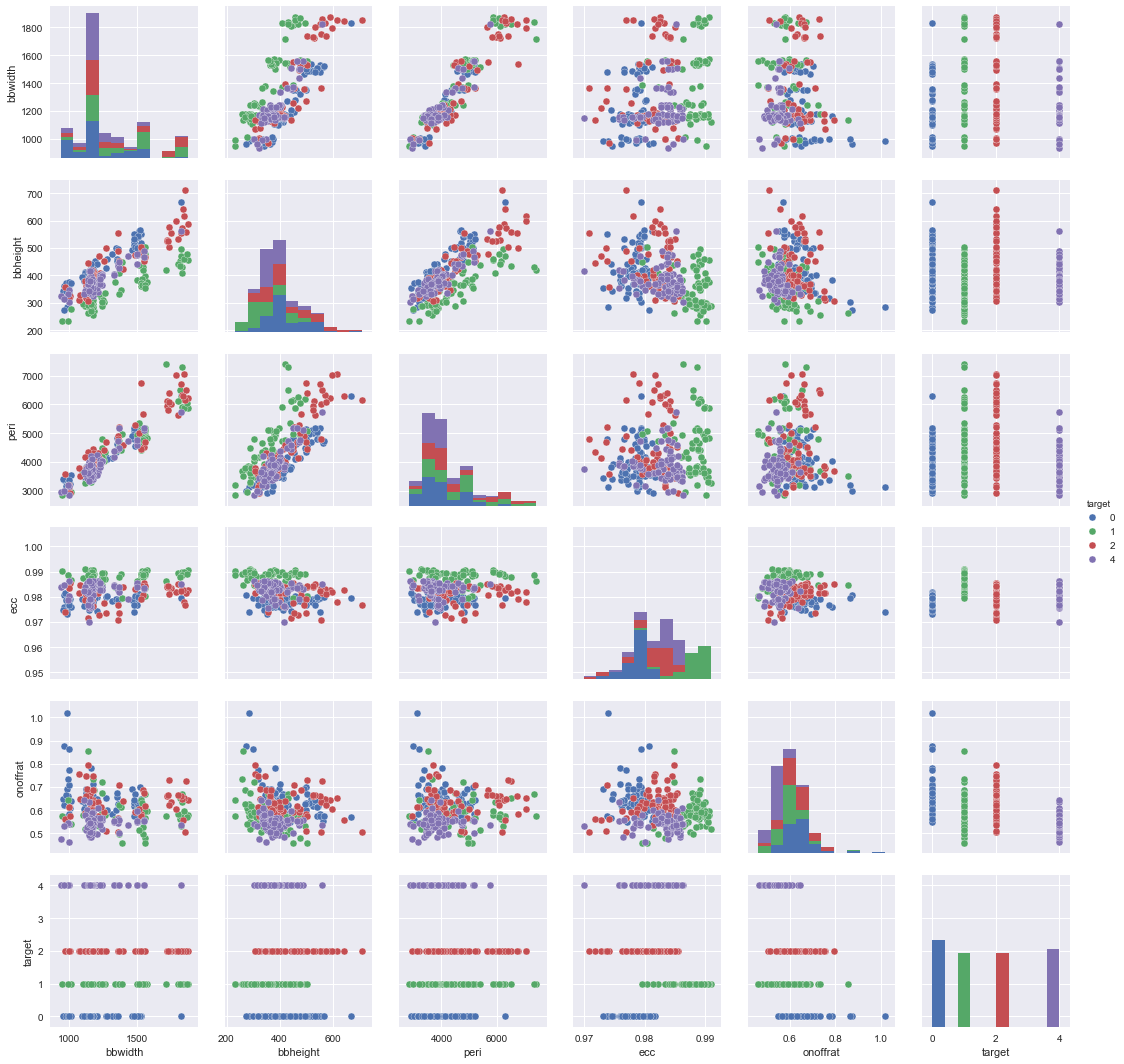

In [8]:
sns.pairplot(data,hue="target")

Get data vectors

In [17]:
X = data.drop("target",axis="columns").values
y = data["target"].values

Split into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Apply PCA and see if there is a significant separation in two principal directions.

First, scale the data values.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Apply PCA to scaled data

In [24]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Plot the transformed data.

In [25]:
from matplotlib.colors import ListedColormap

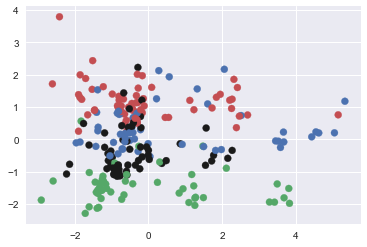

In [26]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap=ListedColormap(["r","g","b","m","k"]))

Not much of a separation with PCA. Try LDA.

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
#clf = QuadraticDiscriminantAnalysis(store_covariance=True)
clf.fit(X_train, y_train)

/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [28]:
X_train_LDA = clf.transform(X_train)
X_test_LDA = clf.transform(X_test)

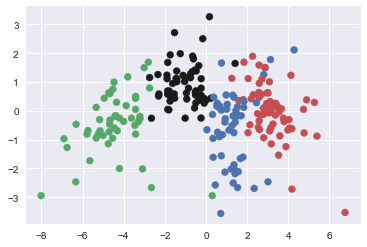

In [29]:
plt.scatter(X_train_LDA[:,0], X_train_LDA[:,1], c=y_train, cmap=ListedColormap(["r","g","b","m","k"]))

# Machine learning pipeline

In [137]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [116]:
data = pd.read_csv("aircraftdata-python.csv",
                   names=["bbwidth","bbheight","peri","ecc","onoffrat","target"])

# Cross-validation skorları için bütün X ve y verisini kullanacağız (kendi içine ayırma yapıyor.)
X = data.drop("target",axis="columns").values
y = data["target"].values

In [146]:
def models_cv(nfolds=30):
    gbrt = GradientBoostingClassifier(max_depth=3)
    svc = SVC(C=100,gamma=0.01)
    rf = RandomForestClassifier(n_estimators=20, max_features=3,max_depth=3)
    adab = AdaBoostClassifier(n_estimators=30)
    gnb = GaussianNB()
    logreg = LogisticRegression(C=0.01)
    ann = MLPClassifier(solver='lbfgs', alpha=0.1,hidden_layer_sizes=(8,))
    knn = KNeighborsClassifier()
    methodslist = [("Random forest", rf),
               ("Gradient Boosting", gbrt),
               ("AdaBoost", adab),
               ("Gaussian Naive Bayes", gnb),
               ("Logistic Regression", logreg),
               ("Support-Vector Machines", svc),
               ("Neural network", ann),
                ("K-neighbors", knn)]

    print("Cross-validation accuracy scores (number of folds = {})".format(n))
    
    for name, clf in methodslist:
        pipe = Pipeline([('clf', clf)])
        scores = cross_val_score(pipe, X, y, cv = KFold(n_splits=nfolds, shuffle=True))
        print(name, "{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

        pipe = Pipeline([('scl',StandardScaler()),('clf', clf)])
        scores = cross_val_score(pipe, X, y, cv = KFold(n_splits=nfolds, shuffle=True))
        print("Scaling +",name, "{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

        pipe = Pipeline([('lda',LinearDiscriminantAnalysis()),('clf', clf)])
        scores = cross_val_score(pipe, X, y, cv = KFold(n_splits=nfolds, shuffle=True))
        print("LDA +",name,"{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

        pipe = Pipeline([('scl',StandardScaler()),('lda',LinearDiscriminantAnalysis()),('clf', clf)])
        scores = cross_val_score(pipe, X, y, cv = KFold(n_splits=nfolds, shuffle=True))
        print("Scaling + LDA +",name, "{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

        print()

In [147]:
models_cv()

Cross-validation accuracy scores (number of folds = 30)
Random forest 0.79 +/- 0.11
Scaling + Random forest 0.82 +/- 0.13
LDA + Random forest 0.89 +/- 0.08
Scaling + LDA + Random forest 0.88 +/- 0.12

Gradient Boosting 0.82 +/- 0.11
Scaling + Gradient Boosting 0.83 +/- 0.11
LDA + Gradient Boosting 0.88 +/- 0.09
Scaling + LDA + Gradient Boosting 0.88 +/- 0.12

AdaBoost 0.77 +/- 0.15
Scaling + AdaBoost 0.78 +/- 0.13
LDA + AdaBoost 0.54 +/- 0.19
Scaling + LDA + AdaBoost 0.51 +/- 0.16

Gaussian Naive Bayes 0.55 +/- 0.17
Scaling + Gaussian Naive Bayes 0.70 +/- 0.15
LDA + Gaussian Naive Bayes 0.90 +/- 0.08
Scaling + LDA + Gaussian Naive Bayes 0.90 +/- 0.11

Logistic Regression 0.66 +/- 0.15
Scaling + Logistic Regression 0.71 +/- 0.13
LDA + Logistic Regression 0.71 +/- 0.13
Scaling + LDA + Logistic Regression 0.71 +/- 0.17

Support-Vector Machines 0.32 +/- 0.18
Scaling + Support-Vector Machines 0.92 +/- 0.08
LDA + Support-Vector Machines 0.91 +/- 0.09
Scaling + LDA + Support-Vector Machines 0

# Checking ANN's of different sizes 

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
for s1 in [8, 12, 16]:
    ann = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(s1,))
    pipe = Pipeline([('lda',LinearDiscriminantAnalysis()),('ann', ann)])
    scores = cross_val_score(pipe, X_train, y_train, cv = KFold(n_splits=24, shuffle=True))
    print("layer size = {}, LDA + ANN: {:.2f} +/- {:.2f}".format(s1, scores.mean(), scores.std()))

layer size = 8, LDA + ANN: 0.91 +/- 0.07


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layer size = 12, LDA + ANN: 0.92 +/- 0.10
layer size = 16, LDA + ANN: 0.92 +/- 0.07


In [157]:
for s1 in [8, 12, 16]:
    for s2 in [8, 12, 16]:
        ann = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(s1,s2))
        pipe = Pipeline([('lda',LinearDiscriminantAnalysis()),('ann', ann)])
        scores = cross_val_score(pipe, X_train, y_train, cv = KFold(n_splits=24, shuffle=True))
        print("layers = ({},{}), LDA + ANN {:.2f} +/- {:.2f}".format(s1,s2,scores.mean(), scores.std()))

/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,8), LDA + ANN 0.92 +/- 0.11


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,12), LDA + ANN 0.91 +/- 0.08


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,16), LDA + ANN 0.92 +/- 0.08
layers = (12,8), LDA + ANN 0.91 +/- 0.09


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (12,12), LDA + ANN 0.89 +/- 0.09


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (12,16), LDA + ANN 0.92 +/- 0.08


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,8), LDA + ANN 0.90 +/- 0.09


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,12), LDA + ANN 0.90 +/- 0.11


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,16), LDA + ANN 0.91 +/- 0.07


In [158]:
for s1 in [8, 12, 16]:
    for s2 in [8, 12, 16]:
        for s3 in [8, 12, 16]:
            ann = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(s1, s2, s3))
            pipe = Pipeline([('lda',LinearDiscriminantAnalysis()),('ann', ann)])
            scores = cross_val_score(pipe, X_train, y_train, cv = KFold(n_splits=24, shuffle=True))
            print("layers = ({},{},{}) LDA + ANN {:.2f} +/- {:.2f}".format(s1, s2, s3, scores.mean(), scores.std()))

/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,8,8) LDA + ANN 0.91 +/- 0.08
layers = (8,8,12) LDA + ANN 0.91 +/- 0.06


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,8,16) LDA + ANN 0.90 +/- 0.10


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,12,8) LDA + ANN 0.92 +/- 0.07


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,12,12) LDA + ANN 0.90 +/- 0.10
layers = (8,12,16) LDA + ANN 0.90 +/- 0.09


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,16,8) LDA + ANN 0.91 +/- 0.08


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,16,12) LDA + ANN 0.91 +/- 0.10


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (8,16,16) LDA + ANN 0.90 +/- 0.08
layers = (12,8,8) LDA + ANN 0.91 +/- 0.10


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (12,8,12) LDA + ANN 0.90 +/- 0.10


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (12,8,16) LDA + ANN 0.91 +/- 0.09


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (12,12,8) LDA + ANN 0.89 +/- 0.09
layers = (12,12,12) LDA + ANN 0.91 +/- 0.10


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (12,12,16) LDA + ANN 0.90 +/- 0.06


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (12,16,8) LDA + ANN 0.92 +/- 0.08
layers = (12,16,12) LDA + ANN 0.90 +/- 0.10


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (12,16,16) LDA + ANN 0.91 +/- 0.08


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,8,8) LDA + ANN 0.90 +/- 0.09
layers = (16,8,12) LDA + ANN 0.92 +/- 0.09


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,8,16) LDA + ANN 0.90 +/- 0.07


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,12,8) LDA + ANN 0.92 +/- 0.08


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,12,12) LDA + ANN 0.89 +/- 0.10


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,12,16) LDA + ANN 0.90 +/- 0.08


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,16,8) LDA + ANN 0.93 +/- 0.10


/home/kaan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


layers = (16,16,12) LDA + ANN 0.91 +/- 0.10
layers = (16,16,16) LDA + ANN 0.89 +/- 0.10


Apply the best cases to test sets

In [160]:
ann = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(16, 16, 8))
pipe = Pipeline([('lda',LinearDiscriminantAnalysis()),('ann', ann)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8666666666666667

In [161]:
ann = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(12,))
pipe = Pipeline([('lda',LinearDiscriminantAnalysis()),('ann', ann)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8333333333333334

Score is lower than the training score. Overfitting.